# Maven Roasters Coffee Sales

##  Table of Contents
* 1. [Libraries](#1)
* 2. [Dataset](#2)
      * 2.1 [Loading the dataset](#2.1)
      * 2.2 [Checking for NA values and duplicates](#2.2)
      * 2.3 [Unique Values](#2.3)
* 3. [Feature Engineering](#3)
      * 3.1 [Transforming date and time variables to datetime](#3.1)
      * 3.2 [Creating 3 more variables: transaction_day, transaction_month, transaction_year](#3.2)
      * 3.3 [Creating 3 more variables: transaction_hour, transaction_minute, transaction_second](#3.3)
      * 3.4 [Total Revenue per Transaction](#3.4)
* 4. [Exploratory Data Analysis](#4)
      * 4.1 [Descriptive Statistics](#4.1)
      * 4.2 [Transactions by Day and Month](#4.2)
      * 4.3 [Transactions by Hour](#4.3)
      * 4.4 [Items Sold per Month](#4.4)
      * 4.5 [Transactions and Items sold per Store Location](#4.5)
      * 4.6 [Total Revenue by Store Location](#4.6)
      * 4.7 [Top Product Categories: Transactions vs Quantity Sold](#4.7)
      * 4.8 [Top Product Types: Transactions vs Quantity Sold](#4.8)
        * 4.8.1 [Comparison of product_type transactions vs quantity sold](#4.8.1)
      * 4.9 [Product Category Quantity Sold per Store Location](#4.9)
      * 4.10 [Product Revenue Analysis](#4.10)
        * 4.10.1 [Most Expensive Products on Average](#4.10.1)
        * 4.10.2 [Revenue by product category](#4.10.2)
        * 4.10.3 [Revenue by product type](#4.10.3)
        * 4.10.4 [Revenue by product category in each store location](#4.10.4)
        * 4.10.5 [Top 10 Products by: Revenue, Quantity Sold and Transactions](#4.10.5)
        * 4.10.6 [Hourly Revenue in each Store Location](#4.10.6)
        * 4.10.7 [Trend of Total Revenue Over Time](#4.10.7)
      * 4.11 [Relationship Between Unit Price, Transaction Quantity, and Total Revenue](#4.11)

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

## 2. Dataset <a id=2><a/>

### 2.1 Loading the dataset <a id=2.1><a/>

In [2]:
# Path depending on environment
if os.path.exists("/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv"):
    file_path = "/kaggle/input/trends-product-coffee-shop-sales-revenue-dataset/coffee-shop-sales-revenue.csv"
else:
    file_path = "coffee-shop-sales-revenue.csv"  # local path in PyCharm

data = pd.read_csv(file_path, sep="|")
print(data.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [3]:
data = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
print(data.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [4]:
print(data.dtypes)

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object


In [5]:
print(data.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [6]:
data.shape

(149116, 11)

### 2.2 Checking for NA values and duplicates <a id=2.2><a/>

In [7]:
print(data.isna().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [8]:
print(data.duplicated().sum())

0


### 2.3 Unique Values <a id=2.3><a/>

In [9]:
pd.DataFrame(data.nunique(), columns=['Number of unique values'])

,Number of unique values
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
store_location,3
product_id,80
unit_price,41
product_category,9
product_type,29


In [10]:
def unique_values(column):
    return pd.DataFrame(data[column].unique(), columns=['Unique values'])

In [11]:
print(unique_values('transaction_qty'))

   Unique values
0              2
1              1
2              3
3              4
4              8
5              6


In [12]:
print(unique_values('store_id'))

   Unique values
0              5
1              8
2              3


In [13]:
print(unique_values('store_location'))

     Unique values
0  Lower Manhattan
1   Hell's Kitchen
2          Astoria


In [14]:
print(unique_values('product_id'))

    Unique values
0              32
1              57
2              59
3              22
4              77
..            ...
75              2
76             81
77             14
78              8
79             82

[80 rows x 1 columns]


In [15]:
print(unique_values('product_category'))

        Unique values
0              Coffee
1                 Tea
2  Drinking Chocolate
3              Bakery
4            Flavours
5           Loose Tea
6        Coffee beans
7  Packaged Chocolate
8             Branded


In [16]:
print(unique_values('product_type'))

            Unique values
0   Gourmet brewed coffee
1         Brewed Chai tea
2           Hot chocolate
3             Drip coffee
4                   Scone
5        Barista Espresso
6        Brewed Black tea
7        Brewed Green tea
8       Brewed herbal tea
9                Biscotti
10                 Pastry
11  Organic brewed coffee
12  Premium brewed coffee
13          Regular syrup
14             Herbal tea
15          Gourmet Beans
16          Organic Beans
17       Sugar free syrup
18     Drinking Chocolate
19          Premium Beans
20               Chai tea
21            Green beans
22         Espresso Beans
23              Green tea
24      Organic Chocolate
25             Housewares
26              Black tea
27      House blend Beans
28               Clothing


In [17]:
print(unique_values('product_detail'))

                  Unique values
0                   Ethiopia Rg
1      Spicy Eye Opener Chai Lg
2             Dark chocolate Lg
3   Our Old Time Diner Blend Sm
4                 Oatmeal Scone
..                          ...
75     Our Old Time Diner Blend
76      I Need My Bean! T-shirt
77                    Earl Grey
78                    Civet Cat
79    I Need My Bean! Diner mug

[80 rows x 1 columns]


## 3. Feature Engineering <a id=3><a/>

### 3.1 Transforming date and time variables to datetime <a id=3.1><a/>

In [18]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y-%m-%d')

In [19]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'], format='%H:%M:%S').dt.time

### 3.2 Creating 3 more variables: (transaction_day, transaction_month, transaction_year) <a id=3.2><a/>
Creating 3 more variables from transaction_date (transaction_day, transaction_month, transaction_year) for further analysis 

In [20]:
data['transaction_day'] = data['transaction_date'].dt.day
data['transaction_month'] = data['transaction_date'].dt.month
data['transaction_year'] = data['transaction_date'].dt.year

In [21]:
data[['transaction_day', 'transaction_month', 'transaction_year']].head()

,transaction_day,transaction_month,transaction_year
0,1,1,2023
1,1,1,2023
2,1,1,2023
3,1,1,2023
4,1,1,2023


### 3.3 Creating 3 more variables: transaction_hour, transaction_minute, transaction_second <a id=3.3><a/>
Creating 3 more variables from transaction_time (transaction_hour, transaction_minutes, transaction_seconds) for further analysis 

In [22]:
time = pd.to_datetime(data['transaction_time'], format='%H:%M:%S')

In [23]:
print(time)

0        1900-01-01 07:06:11
1        1900-01-01 07:08:56
2        1900-01-01 07:14:04
3        1900-01-01 07:20:24
4        1900-01-01 07:22:41
                 ...        
149111   1900-01-01 20:18:41
149112   1900-01-01 20:25:10
149113   1900-01-01 20:31:34
149114   1900-01-01 20:57:19
149115   1900-01-01 20:57:19
Name: transaction_time, Length: 149116, dtype: datetime64[ns]


In [24]:
data['transaction_hour'] = time.dt.hour
data['transaction_minute'] = time.dt.minute
data['transaction_second'] = time.dt.second

In [25]:
time.dt.hour

0          7
1          7
2          7
3          7
4          7
          ..
149111    20
149112    20
149113    20
149114    20
149115    20
Name: transaction_time, Length: 149116, dtype: int32

### 3.4 Total Revenue per Transaction <a id=3.4><a/>

We create a new variable `total_revenue` as the product of `transaction_qty` and `unit_price`.
This represents the total revenue generated from each transaction and will be used for further analysis of sales trends.

In [26]:
data['total_revenue'] = data['transaction_qty'] * data['unit_price']
print(data['total_revenue'].head())

0    6.0
1    6.2
2    9.0
3    2.0
4    6.2
Name: total_revenue, dtype: float64


## 4. Exploratory Data Analysis <a id=4><a/>

### 4.1 Descriptive Statistics <a id=4.1><a/>

In [27]:
print(data[['transaction_qty', 'unit_price']].describe().T)

                    count      mean       std  min  25%  50%   75%   max
transaction_qty  149116.0  1.438276  0.542509  1.0  1.0  1.0  2.00   8.0
unit_price       149116.0  3.382219  2.658723  0.8  2.5  3.0  3.75  45.0


###### The average transaction quantity is approximately 1.44 items, with most transactions being for a single item (median = 1).
###### Unit prices vary widely, from 0.80 to 45 dollars, with an average price of 3.38 dollars, indicating a few high-priced items skewing the mean.

### 4.2 Transactions by Day and Month <a id=4.2><a/>

In [28]:
data.groupby('transaction_month')['transaction_day'].value_counts()
#Jan 15th 663 / Feb 19th 692 / Mar 27th 764 / Apr 16th 989 / May 16th 1219 / Jun 19th 1343

transaction_month  transaction_day
1                  15                  663
                   16                  627
                   13                  625
                   19                  616
                   10                  602
                                      ... 
6                  30                 1095
                   7                  1083
                   28                 1070
                   6                  1041
                   29                 1009
Name: count, Length: 181, dtype: int64

In [29]:
print(data['transaction_month'].value_counts().sort_index())
#June has the most transactions with 35352 in total.

transaction_month
1    17314
2    16359
3    21229
4    25335
5    33527
6    35352
Name: count, dtype: int64


In [30]:
counts = data['transaction_month'].value_counts().sort_index().values
print(counts)

[17314 16359 21229 25335 33527 35352]


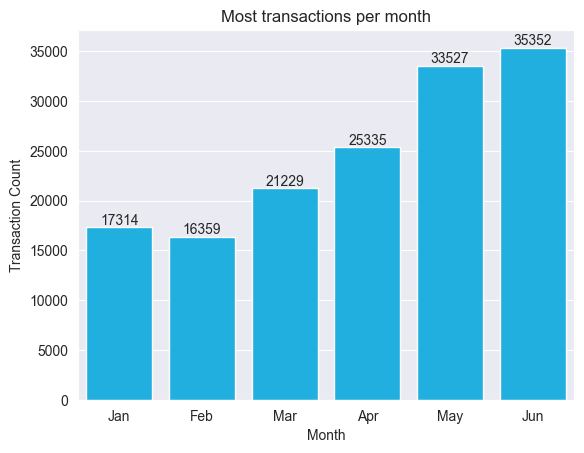

In [31]:
#Countplot
ax=sns.countplot(data=data, x='transaction_month', color="deepskyblue")
#Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
ax.set_xticks(range(6))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#transactions per month in an array using numpy
counts = data['transaction_month'].value_counts().sort_index().values
# Add labels on top of bars
ax.bar_label(container=ax.containers[0], labels=counts)
#Plot labels
plt.title("Most transactions per month")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.show()

###### Most transactions occur in June (35352).

### 4.3 Transactions by Hour <a id=4.3><a/>

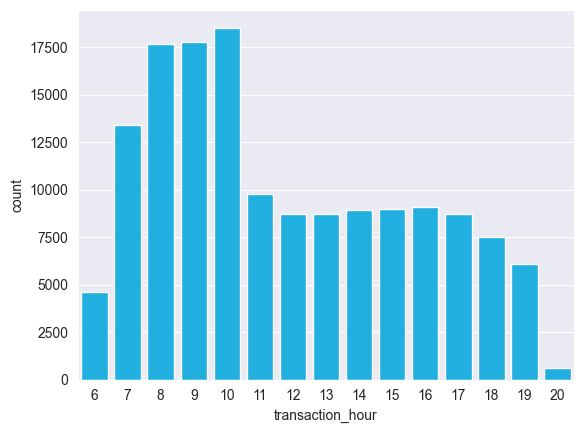

In [32]:
sns.countplot(x="transaction_hour", data=data, color="deepskyblue")
plt.show()
#Most transactions happen in the morning hours (between 7:00-10:00).

###### Most transactions happen in the morning hours (between 7:00-10:00).

### 4.4 Items Sold per Month <a id=4.4><a/>

In [33]:
monthly_item_sales = data.groupby('transaction_month')['transaction_qty'].sum()
print(monthly_item_sales)
#Most

transaction_month
1    24870
2    23550
3    30406
4    36469
5    48233
6    50942
Name: transaction_qty, dtype: int64


In [34]:
print(monthly_item_sales.values)

[24870 23550 30406 36469 48233 50942]


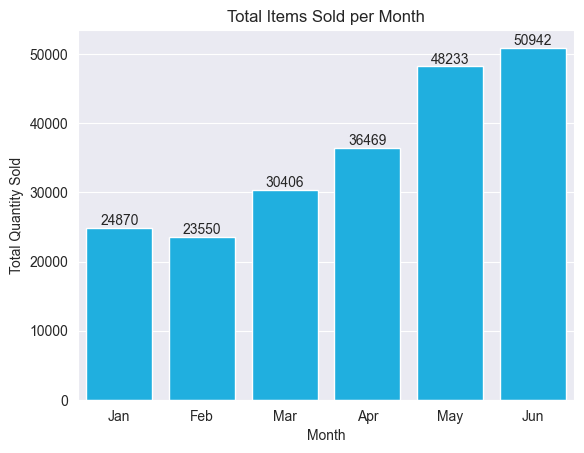

In [35]:
#barplot
ax = sns.barplot(x=monthly_item_sales.index, y=monthly_item_sales.values, color="deepskyblue")
#items sold
ax.bar_label(ax.containers[0])
#month labels
ax.set_xticks(range(6))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#plot labels
plt.title("Total Items Sold per Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

###### Most items were sold in June (50942).

### 4.5 Transactions and Items sold per Store Location <a id=4.5><a/>

In [36]:
print(data['store_location'].value_counts())

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64


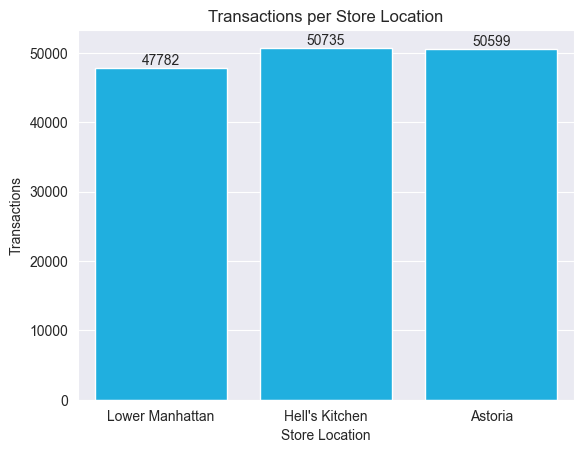

In [37]:
ax = sns.countplot(x="store_location", data=data, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Transactions per Store Location")
plt.xlabel("Store Location")
plt.ylabel("Transactions")
plt.show()

###### Most transactions happen in Hell's Kitchen (50735).

In [38]:
items_loc = data.groupby('store_location')['transaction_qty'].sum()
print(items_loc)

store_location
Astoria            70991
Hell's Kitchen     71737
Lower Manhattan    71742
Name: transaction_qty, dtype: int64


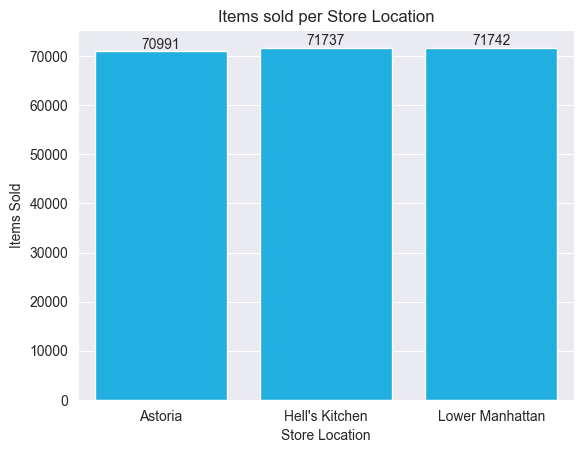

In [39]:
ax = sns.barplot(x=items_loc.index, y=items_loc.values, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Items sold per Store Location")
plt.xlabel("Store Location")
plt.ylabel("Items Sold")
plt.show()

###### Most items sales happen in Lower Manhattan (71742).

### 4.6 Total Revenue by Store Location <a id=4.6><a/>

In [40]:
store_revenue = data.groupby('store_location')['total_revenue'].sum()
print(store_revenue)

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: total_revenue, dtype: float64


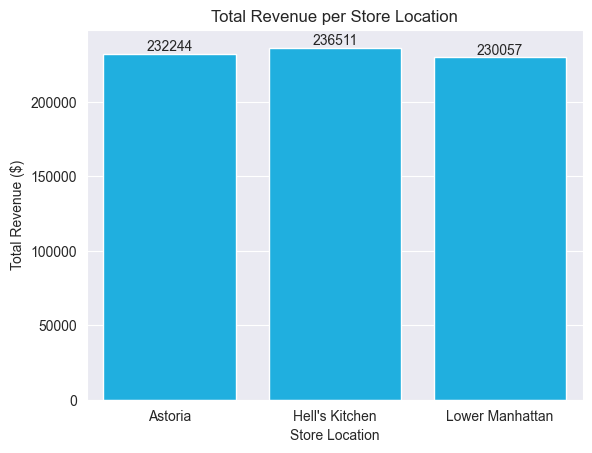

In [41]:
ax = sns.barplot(x=store_revenue.index, y=store_revenue.values, color='deepskyblue')
ax.bar_label(ax.containers[0])
plt.title("Total Revenue per Store Location")
plt.xlabel("Store Location")
plt.ylabel("Total Revenue ($)")
plt.show()

###### All three locations generated approximately $230.000 from January to June.

### 4.7 Top Product Categories: Transactions vs Quantity Sold <a id=4.7><a/>

In [42]:
category_counts = data['product_category'].value_counts()
print(category_counts)

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


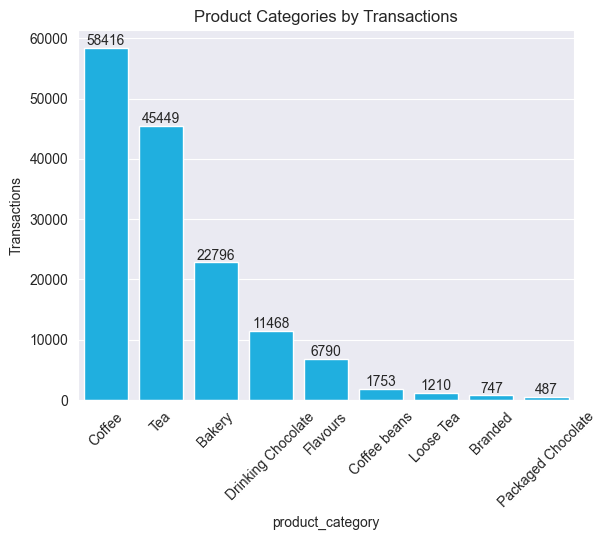

In [43]:
ax = sns.barplot(x=category_counts.index, y=category_counts.values, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Product Categories by Transactions")
plt.ylabel("Transactions")
plt.xticks(rotation=45)
plt.show()

In [44]:
category_sold = data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)
print(category_sold)

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Coffee beans           1828
Loose Tea              1210
Branded                 776
Packaged Chocolate      487
Name: transaction_qty, dtype: int64


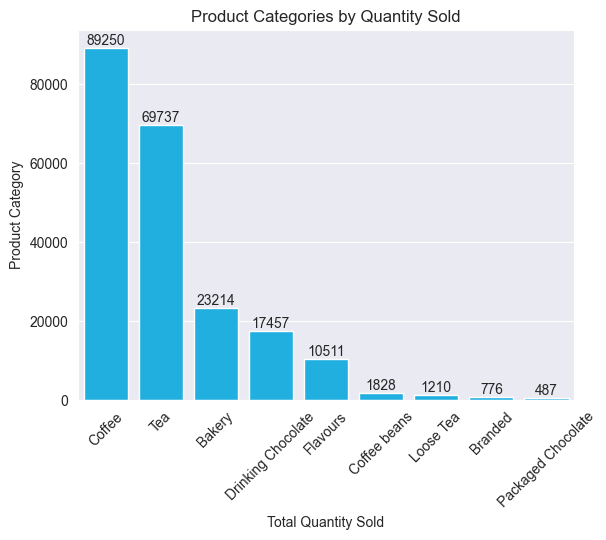

In [45]:
ax = sns.barplot(x=category_sold.index, y=category_sold.values, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Product Categories by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.show()

###### The product category with most sales and transactions is Coffee, followed by Tea and Bakery products.

### 4.8 Top Product Types: Transactions vs Quantity Sold <a id=4.8><a/>

In [46]:
type_counts = data['product_type'].value_counts()
top_types = type_counts.head(10)
print(top_types)

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64


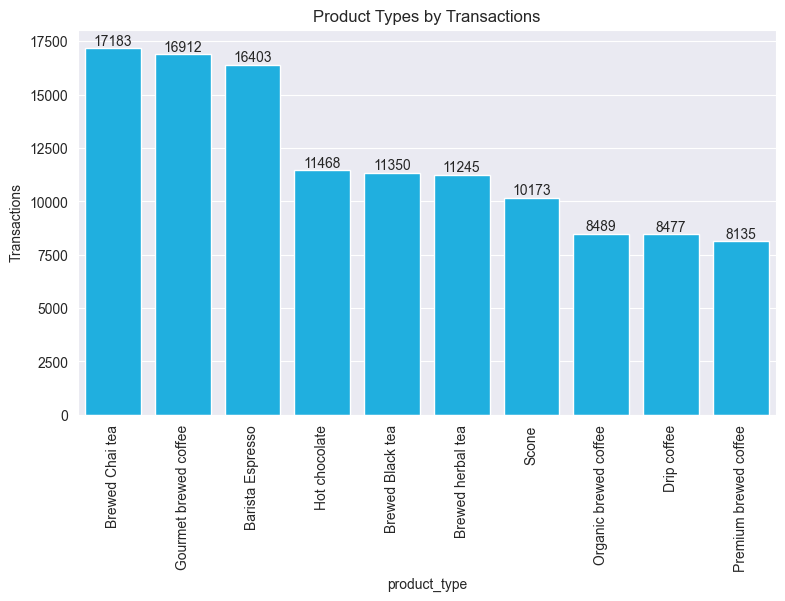

In [47]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=top_types.index, y=top_types.values, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Product Types by Transactions")
plt.ylabel("Transactions")
plt.xticks(rotation=90)
plt.show()

In [48]:
type_sold = data.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False)
top_types_qty = type_sold.head(10)
print(top_types_qty)

product_type
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Name: transaction_qty, dtype: int64


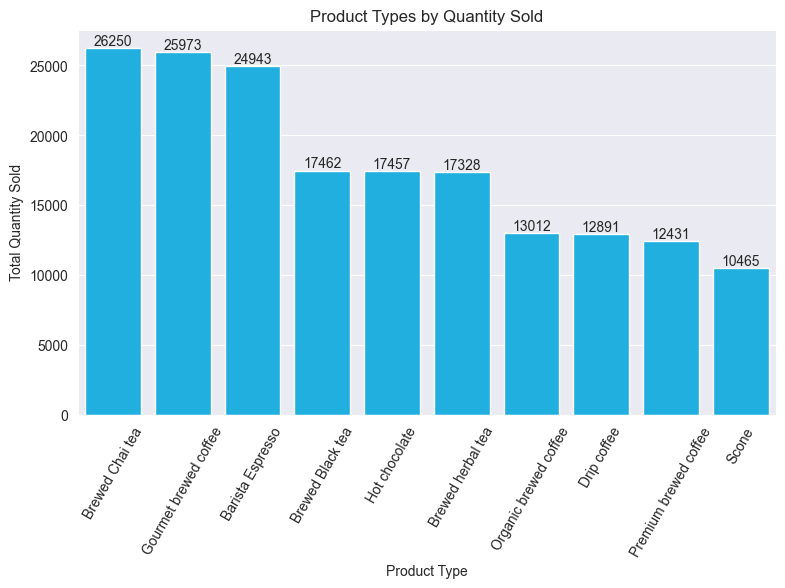

In [49]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=top_types_qty.index, y=top_types_qty.values, color='deepskyblue')
ax.bar_label(ax.containers[0])
plt.title("Product Types by Quantity Sold")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Type")
plt.xticks(rotation=60)
plt.show()

#### 4.8.1 Comparison of product_type transactions vs quantity sold. <a id=4.8.1><a/>

In [50]:
compare = pd.DataFrame({'Transactions': type_counts,'Quantity Sold': type_sold,})
print(compare.sort_values(by='Quantity Sold', ascending=False))

                       Transactions  Quantity Sold
product_type                                      
Brewed Chai tea               17183          26250
Gourmet brewed coffee         16912          25973
Barista Espresso              16403          24943
Brewed Black tea              11350          17462
Hot chocolate                 11468          17457
Brewed herbal tea             11245          17328
Organic brewed coffee          8489          13012
Drip coffee                    8477          12891
Premium brewed coffee          8135          12431
Scone                         10173          10465
Brewed Green tea               5671           8697
Regular syrup                  4979           7606
Pastry                         6912           6961
Biscotti                       5711           5788
Sugar free syrup               1811           2905
Housewares                      526            555
Chai tea                        443            443
Organic Beans                  

### 4.9 Product Category Quantity Sold per Store Location <a id=4.9><a/>

In [51]:
cat_location_sales = data.groupby(['store_location', 'product_category'])['transaction_qty'].sum().reset_index().sort_values(['store_location', 'transaction_qty'], ascending=[True, False])
print(cat_location_sales)

     store_location    product_category  transaction_qty
2           Astoria              Coffee            29655
8           Astoria                 Tea            24048
0           Astoria              Bakery             7496
4           Astoria  Drinking Chocolate             6351
5           Astoria            Flavours             2206
3           Astoria        Coffee beans              502
6           Astoria           Loose Tea              344
1           Astoria             Branded              279
7           Astoria  Packaged Chocolate              110
11   Hell's Kitchen              Coffee            30220
17   Hell's Kitchen                 Tea            22980
9    Hell's Kitchen              Bakery             7678
13   Hell's Kitchen  Drinking Chocolate             5672
14   Hell's Kitchen            Flavours             3596
12   Hell's Kitchen        Coffee beans              790
15   Hell's Kitchen           Loose Tea              485
16   Hell's Kitchen  Packaged C

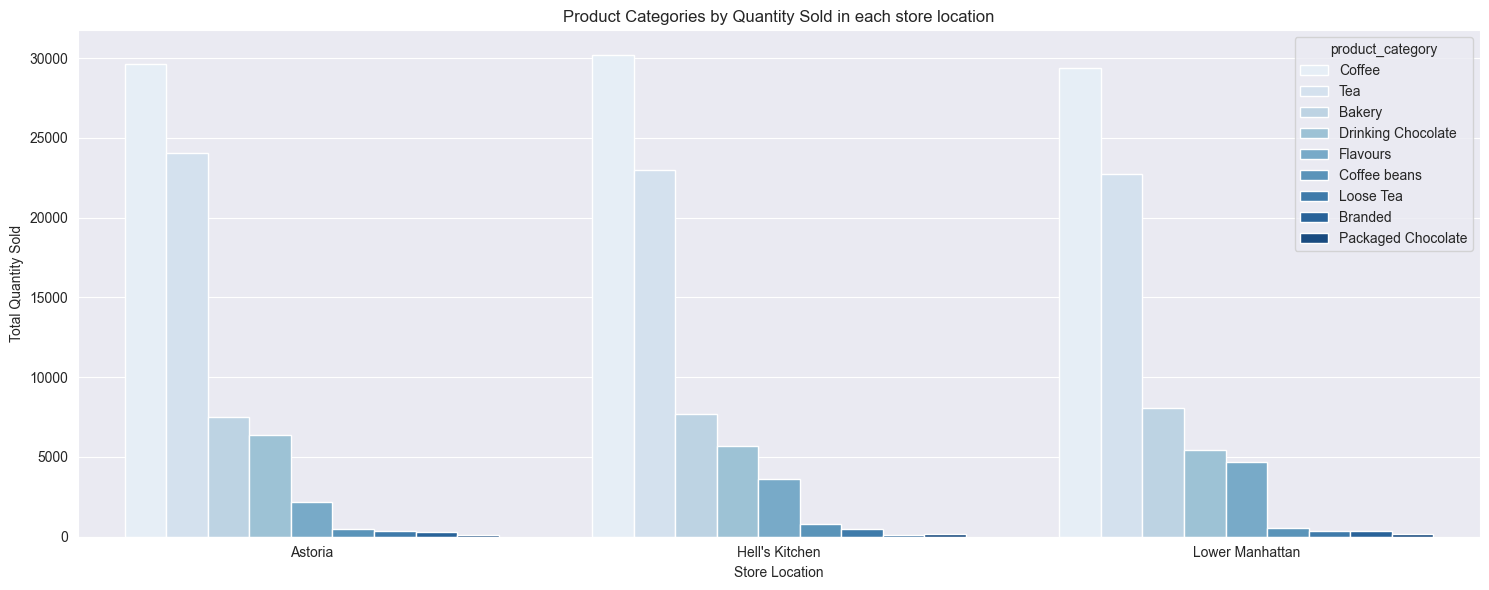

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(x='store_location', y='transaction_qty', data=cat_location_sales, hue='product_category', palette='Blues')
plt.title("Product Categories by Quantity Sold in each store location")
plt.xlabel("Store Location")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()

###### We see that in all three stores coffee, tea and bakery goods are the most prevalent.

### 4.10 Product Revenue Analysis <a id=4.10><a/>
While high sales quantity often correlates with high revenue, this analysis helps identify the most profitable items not just the most frequently sold ones.

#### 4.10.1 Most Expensive Products on Average <a id=4.10.1><a/>

In [53]:
product_prices = data.groupby('product_type')['unit_price'].mean().sort_values(ascending=False)
print(product_prices)

product_type
Premium Beans            34.028274
Clothing                 27.886878
Organic Beans            20.287952
Gourmet Beans            18.573770
House blend Beans        18.000000
Espresso Beans           17.430251
Housewares               13.448669
Drinking Chocolate       10.255789
Green beans              10.000000
Chai tea                  9.709368
Green tea                 9.250000
Black tea                 8.950000
Herbal tea                8.950000
Organic Chocolate         7.600000
Hot chocolate             4.148827
Pastry                    3.685979
Barista Espresso          3.655200
Scone                     3.534638
Biscotti                  3.419503
Premium brewed coffee     3.122452
Brewed Chai tea           2.936993
Organic brewed coffee     2.898021
Brewed herbal tea         2.744731
Brewed Black tea          2.744670
Brewed Green tea          2.742462
Gourmet brewed coffee     2.696641
Drip coffee               2.484959
Sugar free syrup          0.800000
Regular

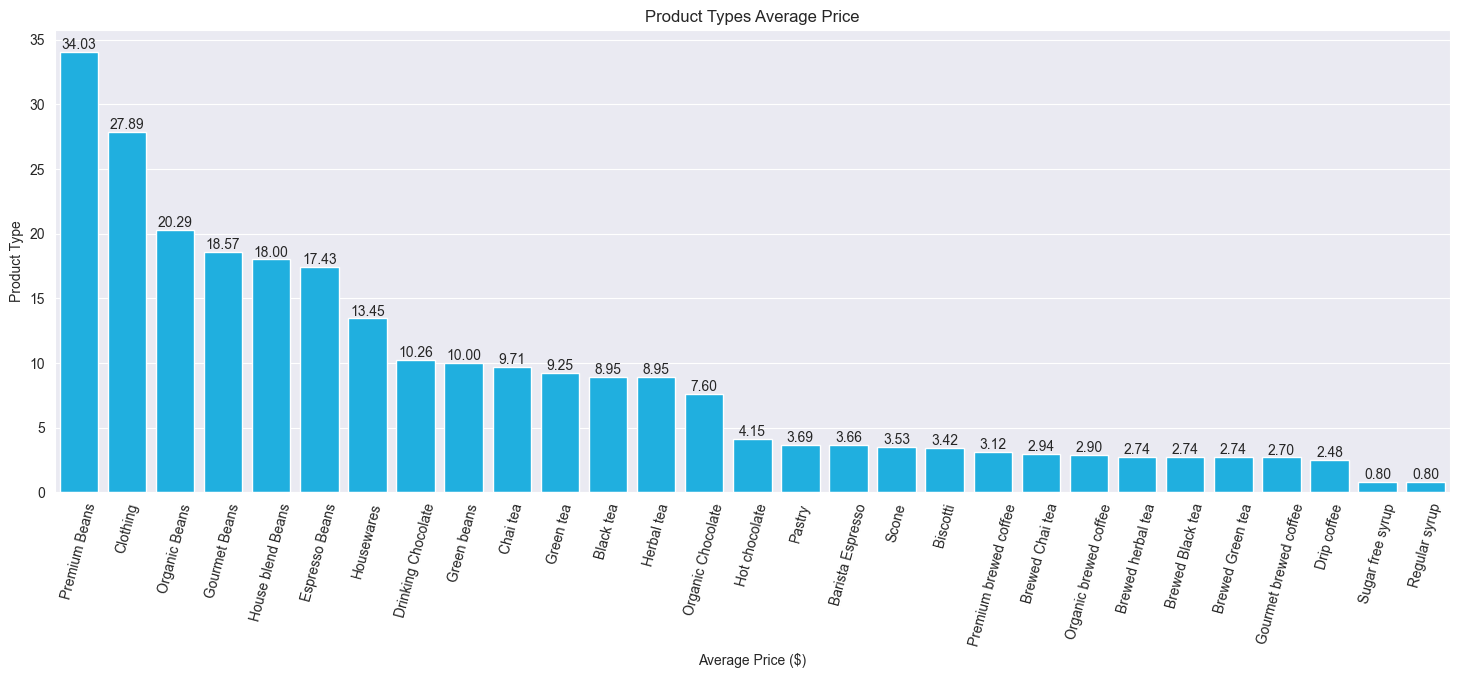

In [54]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x=product_prices.index, y=product_prices.values, color='deepskyblue')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title("Product Types Average Price")
plt.xlabel("Average Price ($)")
plt.ylabel("Product Type")
plt.xticks(rotation=75)
plt.show()

#### 4.10.2 Revenue by product category <a id=4.10.2><a/>

In [55]:
revenue_category = data.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False).reset_index()
print(revenue_category)

     product_category  total_revenue
0              Coffee      269952.45
1                 Tea      196405.95
2              Bakery       82315.64
3  Drinking Chocolate       72416.00
4        Coffee beans       40085.25
5             Branded       13607.00
6           Loose Tea       11213.60
7            Flavours        8408.80
8  Packaged Chocolate        4407.64


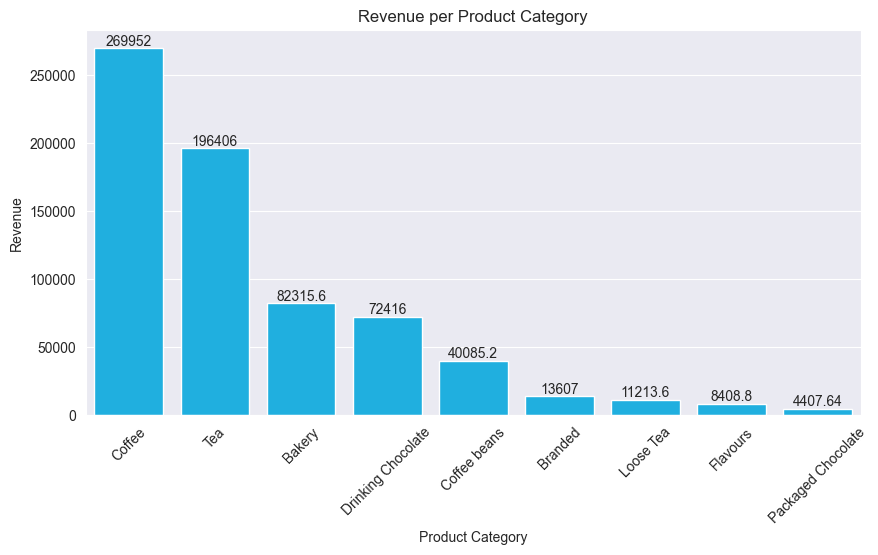

In [56]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="product_category", y="total_revenue", data=revenue_category, color="deepskyblue")
ax.bar_label(ax.containers[0])
plt.title("Revenue per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

#### 4.10.3 Revenue by product type <a id=4.10.3><a/>

In [57]:
revenue_type = data.groupby('product_type')['total_revenue'].sum().sort_values(ascending=False).reset_index()
print(revenue_type)

             product_type  total_revenue
0        Barista Espresso       91406.20
1         Brewed Chai tea       77081.95
2           Hot chocolate       72416.00
3   Gourmet brewed coffee       70034.60
4        Brewed Black tea       47932.00
5       Brewed herbal tea       47539.50
6   Premium brewed coffee       38781.15
7   Organic brewed coffee       37746.50
8                   Scone       36866.12
9             Drip coffee       31984.00
10                 Pastry       25655.99
11       Brewed Green tea       23852.50
12               Biscotti       19793.53
13          Premium Beans       14583.50
14          Organic Beans        8509.50
15             Housewares        7444.00
16          Gourmet Beans        6798.00
17               Clothing        6163.00
18          Regular syrup        6084.80
19         Espresso Beans        5560.25
20               Chai tea        4301.25
21      House blend Beans        3294.00
22             Herbal tea        2729.75
23     Drinking 

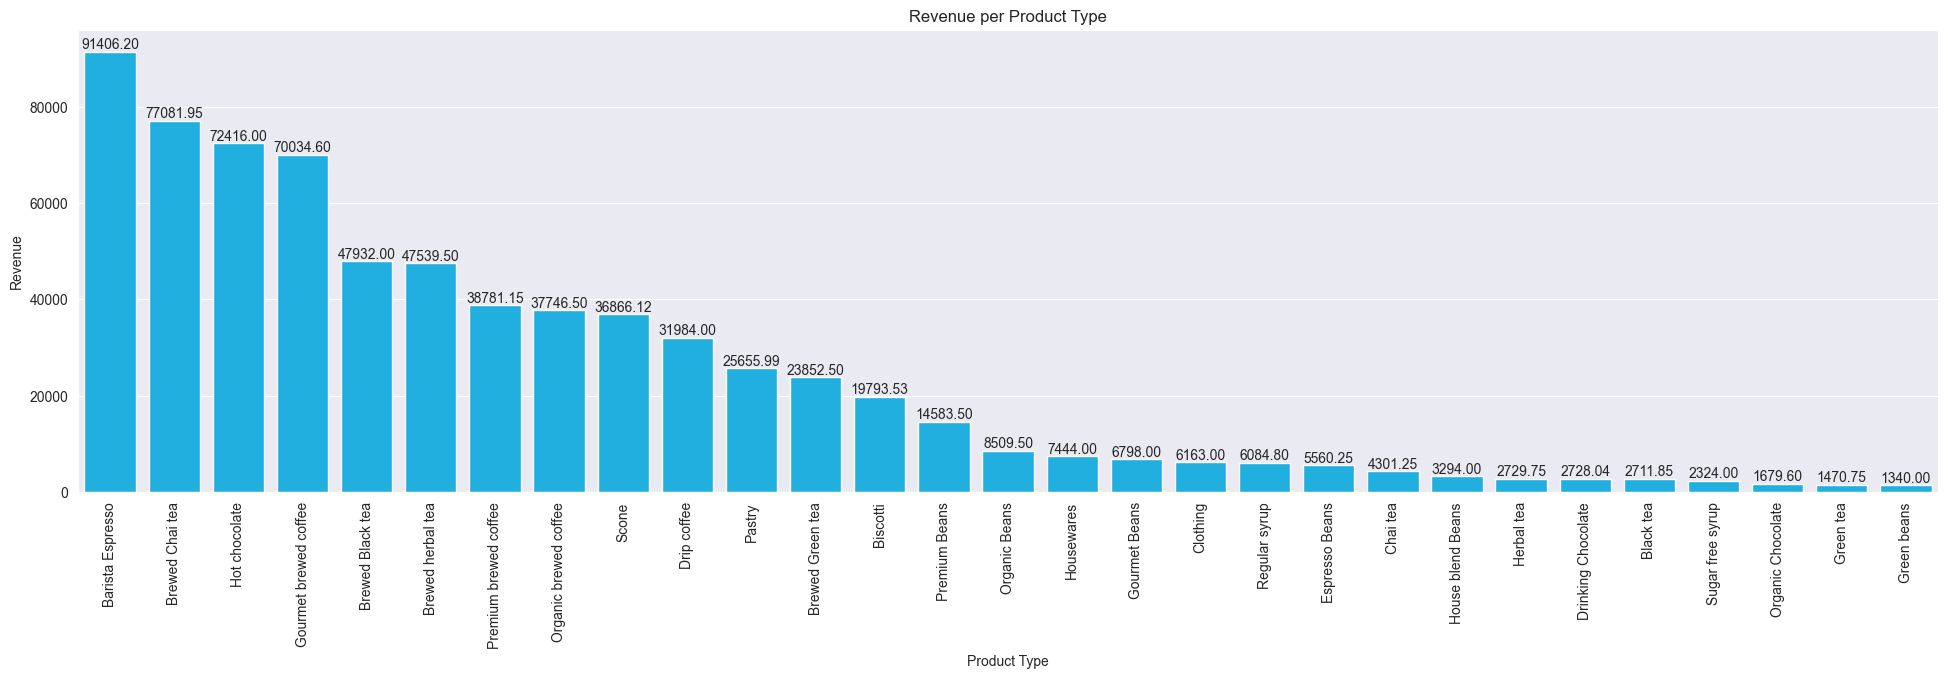

In [58]:
plt.figure(figsize=(24,6))
ax = sns.barplot(x="product_type", y="total_revenue", data=revenue_type, color="deepskyblue")
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title("Revenue per Product Type")
plt.xlabel("Product Type")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

###### Above we see exactly what revenue each product type brings to the cafe.

#### 4.10.4 Revenue by product category in each store location <a id=4.10.4><a/>

In [59]:
rlc = data.groupby(['store_location', 'product_category'])['total_revenue'].sum().reset_index().sort_values(['store_location', 'total_revenue'], ascending=[True, False])
print(rlc)

     store_location    product_category  total_revenue
2           Astoria              Coffee       89744.30
8           Astoria                 Tea       67839.90
0           Astoria              Bakery       26599.75
4           Astoria  Drinking Chocolate       26335.25
3           Astoria        Coffee beans       10219.20
1           Astoria             Branded        5457.00
6           Astoria           Loose Tea        3194.00
5           Astoria            Flavours        1764.80
7           Astoria  Packaged Chocolate        1089.71
11   Hell's Kitchen              Coffee       91222.65
17   Hell's Kitchen                 Tea       64701.30
9    Hell's Kitchen              Bakery       27386.95
13   Hell's Kitchen  Drinking Chocolate       23586.25
12   Hell's Kitchen        Coffee beans       18635.10
15   Hell's Kitchen           Loose Tea        4461.35
14   Hell's Kitchen            Flavours        2876.80
10   Hell's Kitchen             Branded        1942.00
16   Hell'

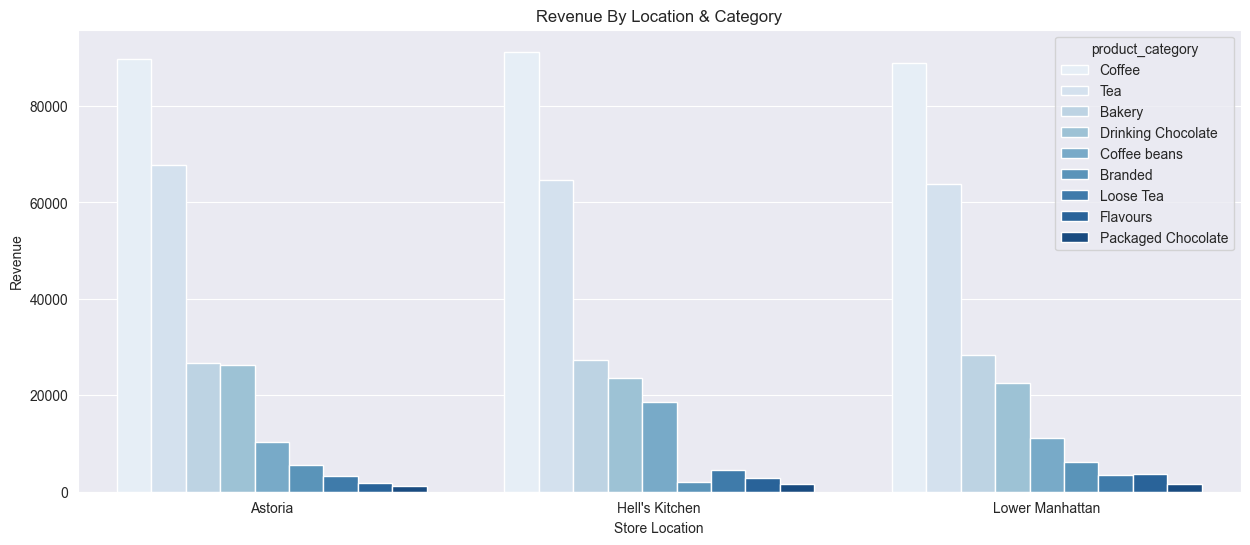

In [60]:
plt.figure(figsize=(15, 6))
sns.barplot(x='store_location', y='total_revenue', data=rlc, hue='product_category', palette='Blues')
plt.title("Revenue By Location & Category")
plt.xlabel("Store Location")
plt.ylabel("Revenue")
plt.show()

###### In all three locations the most profitable products are **coffee** and **tea** followed by **bakery goods** and **drinking chocolate**. These products are lower in price than others (such as coffee beans and merch) but dominate in **volume** and **frequency**.

### 4.10.5 Top 10 Products by: Revenue, Quantity Sold and Transactions <a id=4.10.5><a/>

In [61]:
#transaction data
ptype_tx = data['product_type'].value_counts().head(10)
print(ptype_tx)

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64


In [62]:
#quantity data
ptype_qty = data.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False).head(10)
print(ptype_qty)

product_type
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Name: transaction_qty, dtype: int64


In [63]:
#revenue data
ptype_revenue = data.groupby('product_type')['total_revenue'].sum().sort_values(ascending=False).head(10)
print(ptype_revenue)

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Name: total_revenue, dtype: float64


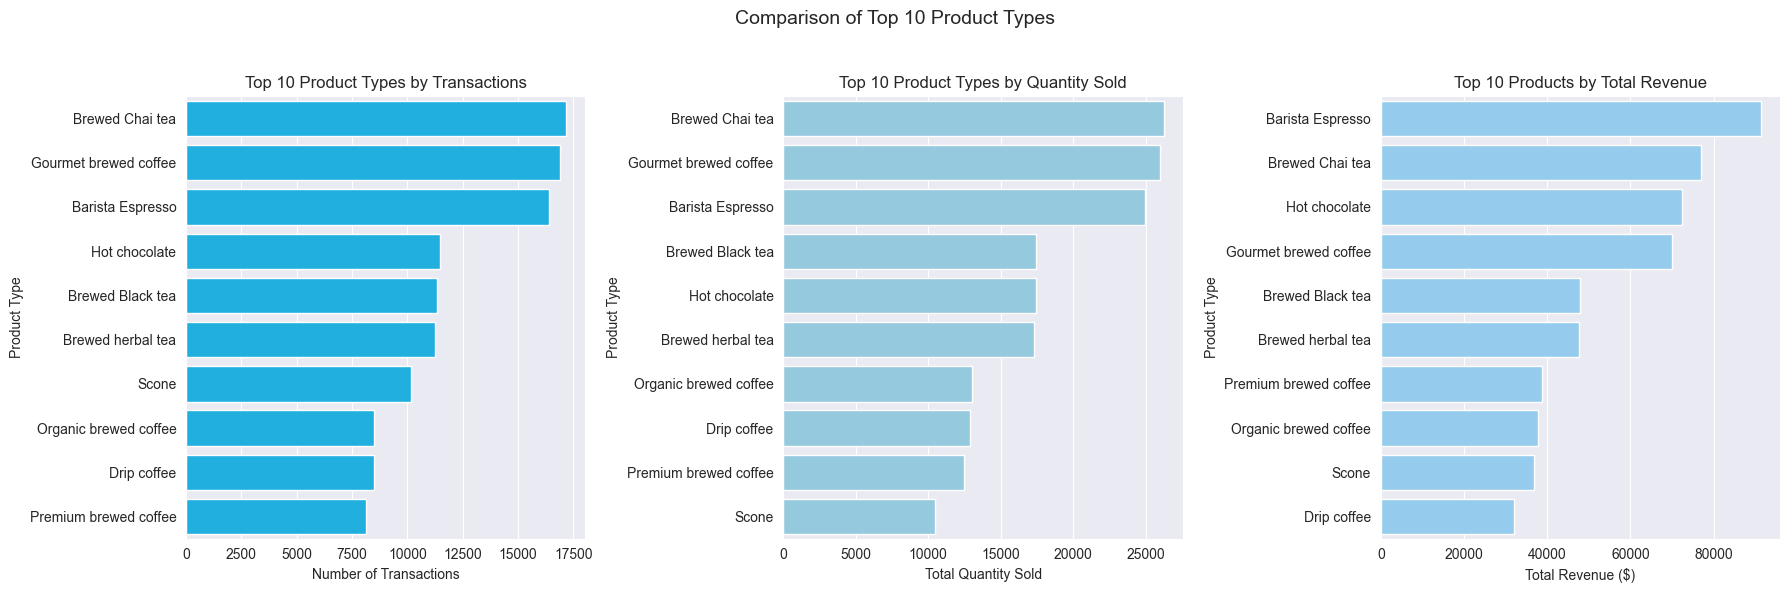

In [64]:
#Plot
plt.figure(figsize=(18, 6))

#transactions
plt.subplot(1, 3, 1)
sns.barplot(x=ptype_tx.values, y=ptype_tx.index, color='deepskyblue')
plt.title("Top 10 Product Types by Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Type")

#quantity
plt.subplot(1, 3, 2)
sns.barplot(x=ptype_qty.values, y=ptype_qty.index, color='skyblue')
plt.title("Top 10 Product Types by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Type")

#total revenue
plt.subplot(1, 3, 3)
sns.barplot(x=ptype_revenue.values, y=ptype_revenue.index, color='lightskyblue')
plt.title("Top 10 Products by Total Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Type")

#layout
plt.suptitle("Comparison of Top 10 Product Types", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Brewed Chai Tea and Gourmet Coffee have the highest number of transactions and quantities sold, but Barista Espresso leads in revenue

### 4.10.6 Hourly Revenue in each Store Location <a id=4.10.6><a/>

In [65]:
hourly_revenue = data.groupby(['transaction_hour', 'store_location'])['total_revenue'].sum().reset_index().sort_values(['store_location', 'total_revenue'], ascending=[True, False])
print(hourly_revenue)

    transaction_hour   store_location  total_revenue
11                10          Astoria       24426.12
8                  9          Astoria       23183.57
5                  8          Astoria       22805.90
2                  7          Astoria       19028.80
38                19          Astoria       16943.65
29                16          Astoria       16110.85
35                18          Astoria       15951.30
20                13          Astoria       15947.87
32                17          Astoria       15839.30
17                12          Astoria       15681.20
26                15          Astoria       15651.95
14                11          Astoria       15498.13
23                14          Astoria       15175.27
12                10   Hell's Kitchen       33605.81
9                  9   Hell's Kitchen       32874.29
6                  8   Hell's Kitchen       31544.44
15                11   Hell's Kitchen       17926.54
3                  7   Hell's Kitchen       15

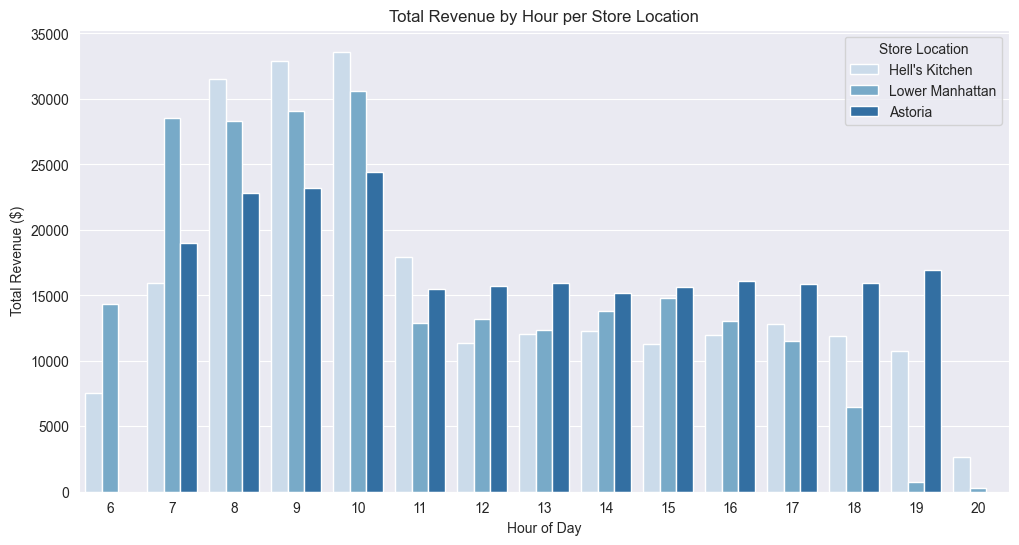

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x='transaction_hour', y='total_revenue', hue='store_location', data=hourly_revenue, palette='Blues', estimator=sum)
plt.title("Total Revenue by Hour per Store Location")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue ($)")
plt.legend(title='Store Location')
plt.show()

###### In all three stores the most revenue is generated in the morning hours (7:00-10:00). The store located in Astoria opens at 7:00 in contrast to the other two which open at 6:00 but maintains higher revenue throughout the day.

### 4.10.7 Trend of Total Revenue Over Time <a id=4.10.7><a/>

This plot shows the daily total revenue for the franchise over the recorded period. It helps us identify peak revenue days/seasons and weekly patterns.

In [67]:
daily_revenue = data.groupby('transaction_date')['total_revenue'].sum().reset_index()

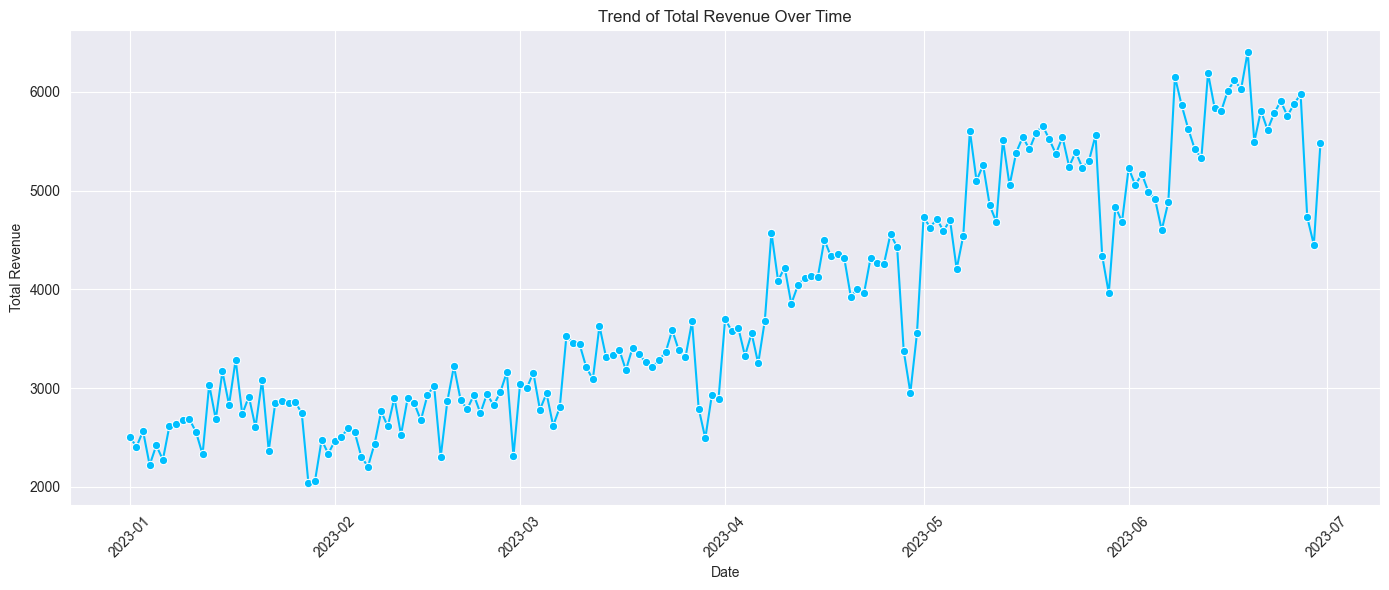

In [68]:
# Plot
plt.figure(figsize=(14,6))
sns.lineplot(x='transaction_date', y='total_revenue', data=daily_revenue, marker='o', color='deepskyblue')
plt.title("Trend of Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.11 Relationship Between Unit Price, Transaction Quantity, and Total Revenue <a id=4.11><a/>

In this section, we explore how the variables *transaction quantity*, *unit price* and *total revenue* are related. We start by checking their distribution, skewness and kurtosis.

In [69]:
#Transaction qty
skew1 = skew(data['transaction_qty'])
kurt1 = kurtosis(data['transaction_qty'])
mean1 = data['transaction_qty'].mean()
median1 = data['transaction_qty'].median()
print("Skewness: ", skew1)
print("Kurtosis: ", kurt1)
print("Mean: ", mean1)
print("Median: ", median1)

Skewness:  0.7998110703421891
Kurtosis:  0.823624549796508
Mean:  1.438276241315486
Median:  1.0


###### Mean: The mean transaction quantity is approximately 1.44, indicating that on average, each transaction involves slightly more than 1 product unit.

###### Median: The median is 1 meaning that half of all transactions involve only a single product unit.

###### Skewness: A skewness of 0.80 indicates a moderate positive skew, showing that some transactions include larger quantities while the majority are small (1–2 units).

###### Kurtosis: A kurtosis of 0.82 suggests the distribution is slightly more peaked than a normal distribution but nothing extreme.

###### Most transactions consist of small quantities with some bigger purchases at times.

In [70]:
#Unit price
skew2 = skew(data['unit_price'])
kurt2 = kurtosis(data['unit_price'])
mean2 = data['transaction_qty'].mean()
median2 = data['transaction_qty'].median()
print("Skewness: ", skew2)
print("Kurtosis: ", kurt2)
print("Mean: ", mean2)
print("Median: ", median2)

Skewness:  8.455002576876039
Kurtosis:  98.9160540316902
Mean:  1.438276241315486
Median:  1.0


###### Mean: The average price per product is $3.38.

###### Median: The median is $3.00, meaning half of the products are priced below this and half above.

###### Skewness: A skewness of 8.46 indicates a strong positive skew, showing that most products are low to mid-priced, with a few high-priced items stretching the distribution to the right.

###### Kurtosis: A kurtosis of 98.92 shows that we have very heavy tails and extreme outliers, meaning that some products are sold at unusually high prices compared to the majority of the dataset.

###### The pricing distribution is heavily right-skewed. Some higher priced products significantly influence the mean, while most items cluster around the lower price range.

In [71]:
#Total Revenue
skew3 = skew(data['total_revenue'])
kurt3 = kurtosis(data['total_revenue'])
mean3 = data['total_revenue'].mean()
median3 = data['total_revenue'].median()
print("Skewness: ", skew3)
print("Kurtosis: ", kurt3)
print("Mean: ", mean3)
print("Median: ", median3)

Skewness:  41.74547945699711
Kurtosis:  3359.6418936320524
Mean:  4.6863671906435265
Median:  3.75


###### Mean: On average each transaction generates a revenue of $4.69.

###### Median: The median is $3.75, meaning that half of the transactions generate less than this amount.

###### Skewness: A very high skewness of 41.75 indicates an extremely right-skewed distribution caused by some very high-revenue transactions.

###### Kurtosis: A kurtosis of 3359.64 indicates extremely heavy tails and extreme outliers.

###### Most transactions generate low to moderate revenue, but a small number of high-value transactions heavily influence the overall distribution.

Text(0.5, 1.0, 'Boxplot of Unit Price')

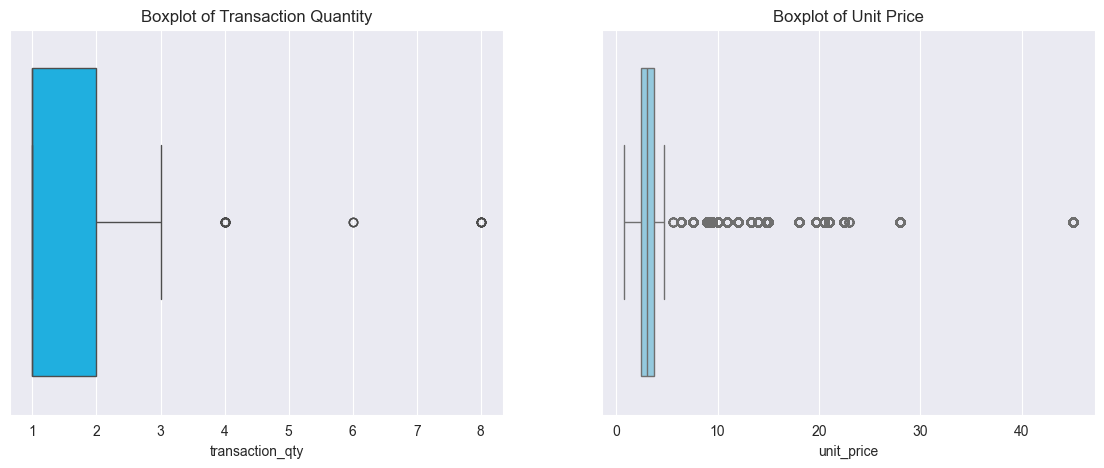

In [72]:
plt.figure(figsize=(14,5))
#Transaction Qty
plt.subplot(1, 2, 1)
sns.boxplot(x=data['transaction_qty'], color='deepskyblue')
plt.title('Boxplot of Transaction Quantity')

#Unit Price
plt.subplot(1, 2, 2)
sns.boxplot(x=data['unit_price'], color='skyblue')
plt.title('Boxplot of Unit Price')

##### Most transactions involve 1–2 items with a few higher-quantity outliers. Prices are mainly low with several high-value outliers indicating right skewness.

Text(0.5, 1.0, 'Boxplot of Total Revenue')

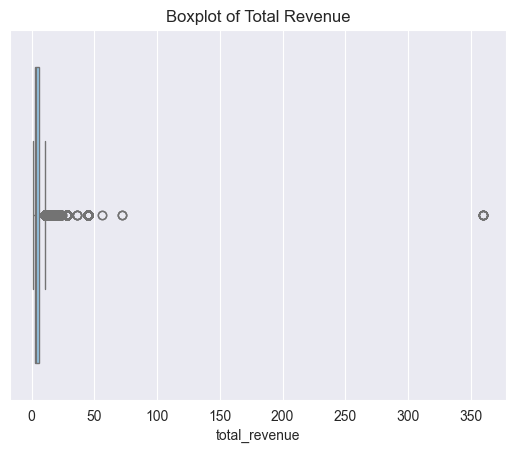

In [73]:
sns.boxplot(x=data['total_revenue'], color='lightskyblue')
plt.title('Boxplot of Total Revenue')

##### Strongly right-skewed distribution with most transactions generating low revenue and a few very large ones.

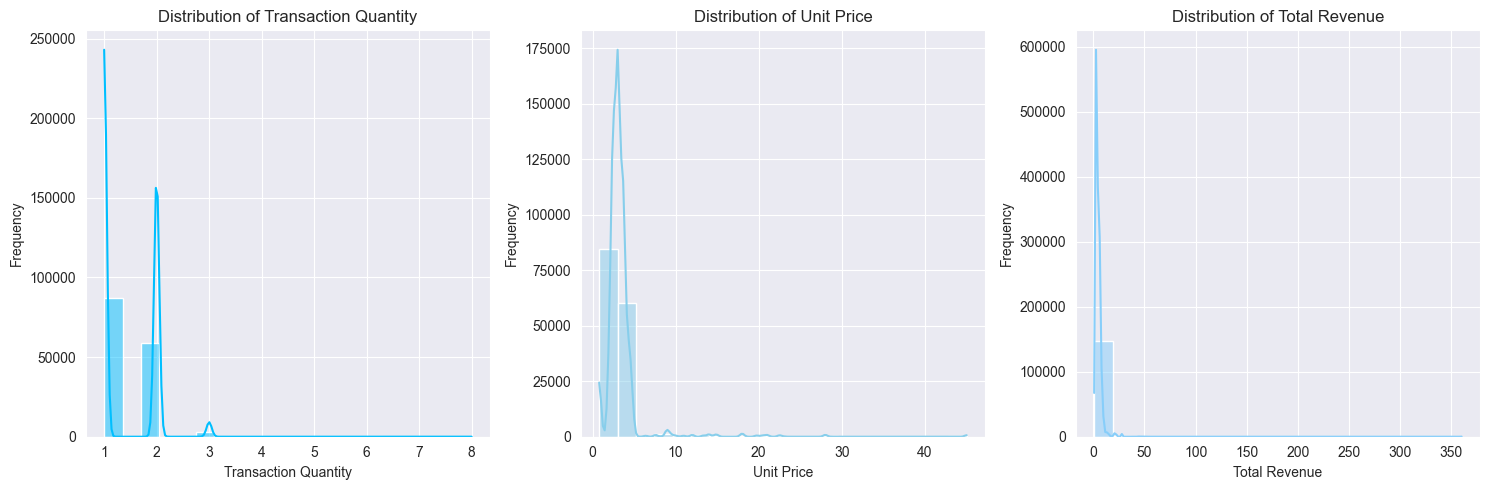

In [74]:
#Plots for distribution analysis
plt.figure(figsize=(15,5))
#Transaction Qty
plt.subplot(1, 3, 1)
sns.histplot(data['transaction_qty'], bins=20, kde=True, color='deepskyblue')
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
#Unit Price
plt.subplot(1, 3, 2)
sns.histplot(data['unit_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
#Total Revenue
plt.subplot(1, 3, 3)
sns.histplot(data['total_revenue'], bins=20, kde=True, color='lightskyblue')
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### From the above plots (boxplot, density plots) we see that the variables **unit_price**, **transaction_qty** and **total_revenue** are not normally distributed, so we will Spearman's non-parametric correlation test.

In [75]:
corr = data[['transaction_qty', 'unit_price', 'total_revenue']].corr(method='spearman')
print(corr)

                 transaction_qty  unit_price  total_revenue
transaction_qty         1.000000   -0.160442       0.680296
unit_price             -0.160442    1.000000       0.529418
total_revenue           0.680296    0.529418       1.000000


##### Spearman Correlation Between Quantity, Unit Price, and Total Revenue

###### - **Transaction Quantity vs. Total Revenue:** ρ ≈ 0.68: Moderate positive correlation which indicates that higher quantities generally drive higher revenue.
###### - **Unit Price vs. Total Revenue:** ρ ≈ 0.53: Moderate positive correlation which indicates that expensive items contribute significantly to revenue.
###### - **Transaction Quantity vs. Unit Price:** ρ ≈ -0.16: Slight negative correlation which indicates that higher priced items tend to be purchased in smaller quantities.

The heatmap below visualizes these relationships clearly.

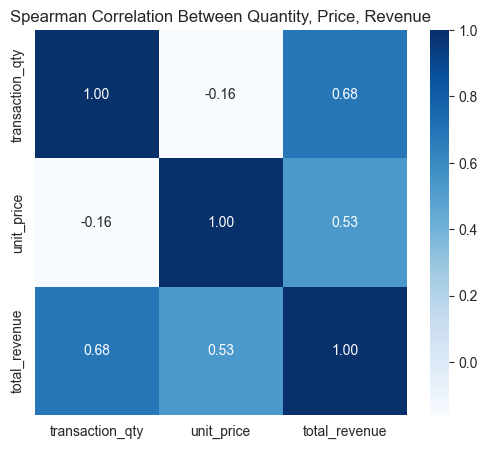

In [76]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Spearman Correlation Between Quantity, Price, Revenue")
plt.show()